<a href="https://colab.research.google.com/github/LuisManuelCatzoliSoriano/EDP-I/blob/main/Caminata_Aleatoria_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Caminata Aleatoria 1D

Consideremos el sistema descrito en la siguiente figura:

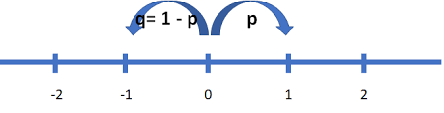

Con probabilidad $p$ de moverse a la derecha y probabilidad $q$ de moverse a la izquierda, tal que $p + q = 1$.

Sea $X_n$ el estado del proceso al tiempo $n$. Está variable cambia de acuerdo a las probabilidades de transición:

$P(X_{n+1}=j|x_n=i)= \left\{\begin{matrix}
p \hspace{0.2cm} si \hspace{0.2cm} j=i+1 \\
q \hspace{0.2cm} si \hspace{0.2cm} j=i-1 \\ 0 \hspace{0.2cm} en \hspace{0.2cm} otro \hspace{0.2cm} caso
\end{matrix}\right.$

Se puede reescribir:

$X_n=x_0+\mu_1+\mu_2+...+\mu_n$, con $x_0=0$

donde $\mu_i$ son variables independientes e identicamente distribuidas, con:

$P(\mu=+1)=p$, $p+q=1$

$P(\mu=-1)=q$

entonces, $\mu$ es una distribución de $Bernoulli(p)$. Por tanto, $X_n$ tiene una distribución $binomial(n,p)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random as r

Empezamos definiendo la función de la caminata aleatoria:

In [ ]:
def caminata(n,p):
  posicion=0
  camino=[posicion]
  for i in range(n):
    a=r.random()
    if a<p:
      posicion=posicion+1
    else:
      posicion=posicion-1
    camino.append(posicion)
  return camino

Ahora graficamos la función, usamos como parámetros $n=100$ y $p=0.5$.

Text(0, 0.5, 'Posicion')

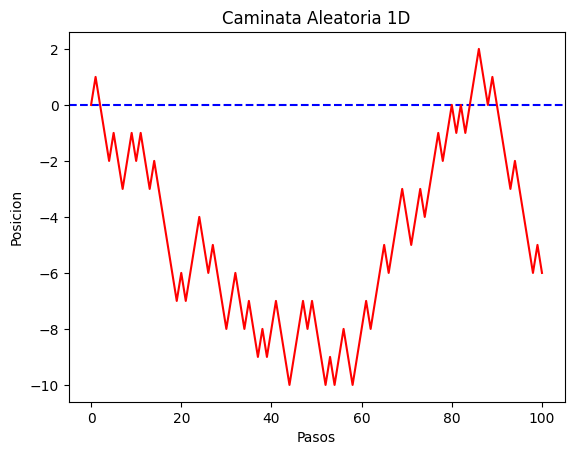

In [ ]:
n=100
p=0.5

cam=caminata(n,p)

plt.title("Caminata Aleatoria 1D")
plt.axhline(0, color='blue', linestyle='--')
plt.plot(cam, color='red')
plt.xlabel("Pasos")
plt.ylabel("Posicion")

¿Qué preguntas surgen?

1. ¿Cuántas veces toca el $0$?

Sabemos que la función $caminata(n,p)$ genera una lista que contiene la posición en cada paso, comenzando desde el $0$. Cuando decimos que la caminata "toca el cero" significa que, en algún paso, el valor de la posición es igual a $0$.

Para solucionar esto, debemos contar cuántas veces aparece el $0$ en la lista de posiciones. Entonces agregaremos un contador para saberlo:


In [ ]:
tocadas_cero = cam.count(0)-1 #Agregamos el -1 ya que descontamos el cero de la posición inicial
print("La caminata toca el cero", tocadas_cero, "veces")

La caminata toca el cero 6 veces


2. ¿Cuál es la media de las posiciones?

Sabemos que la media de las posiciones corresponde al promedio de todos los valores que toma la caminata. Entonces lo que haremos es agregar una función para obtenerla:

In [ ]:
def media_posiciones(camino):
    return sum(camino) / len(camino)

In [ ]:
print("La media de las posiciones es:", media_posiciones(cam))

La media de las posiciones es: -4.693069306930693


3. ¿En qué paso la caminata alcanza su máxima distancia al origen?

Podemos ver que la distancia al origen en cada paso es el valor absoluto de la posición. La máxima distancia al origen es el máximo valor absoluto que toma la caminata y también sería interesente saber en que paso ocurre por primera vez, ya que se puede repetir. Lo que haremos es definir una función que conteste nuestra pregunta:

In [ ]:
def max_distancia_origen(camino):
    distancias = [abs(x) for x in camino]
    max_dist = max(distancias)
    paso = distancias.index(max_dist)
    return max_dist, paso

In [ ]:
max_dist, paso = max_distancia_origen(cam)

print("La máxima distancia al origen es:", max_dist)
print("Se alcanza por primera vez en el paso:", paso)

La máxima distancia al origen es: 10
Se alcanza por primera vez en el paso: 44


4. ¿Cuántas veces la caminata está por arriba y por debajo del cero?

Para que podamos conocer cuántas veces la caminata está por arriba y por debajo del $0$, debemos contar los pasos en posición positiva y negativa, con esto podemos evaluar la simetría de los pasos.

In [50]:
def conteo_arriba_abajo(camino):
    arriba = sum(1 for x in camino if x > 0)
    abajo = sum(1 for x in camino if x < 0)
    return arriba, abajo

In [51]:
arriba, abajo = conteo_arriba_abajo(cam)

print("Pasos por arriba del cero:", arriba)
print("Pasos por debajo del cero:", abajo)

Pasos por arriba del cero: 5
Pasos por debajo del cero: 89


Conclusiones:

Podemos concluir que el modelo que simula la caminata aleatoria parte del origen, en cada paso, el movimiento hacia la derecha o izquierda depende de una variable aleatoria.

Cuando contamos las veces que la caminata toca el $0$, nos dimos cuenta que no hay una tendencia definida en el movimiento.

En cuanto a la media de las posiciones nos dimos cuenta que para una caminata simétrica con probabilidad $p=0.5$, el valor de la media de la posición es cercana a $0$. Aunque pueden existir sesgos debido a la aleatoriedad del proceso.

Al calcular la máxima distancia al origen nos dimos cuenta que, a pesar de que la media tiende a $0$, la caminata puede alejarse considerablemente del origen.

Finalmente en cuanto a los pasos negativos y positivos, podemos concluir que si son muy diferentes, hay un posible sesgo.